<a href="https://colab.research.google.com/github/sirumallasrinivas/aiml/blob/main/DPhi_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

In [2]:
#import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import f1_score




In [3]:
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )
insurance_data.head()


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [5]:
count_of_missval_by_col = (insurance_data.isnull().sum())
print(count_of_missval_by_col)

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64


In [6]:
#1.Fill the missing values in 'Gender' column with 'Not Specified'
from sklearn.impute import SimpleImputer
const_imputer = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value='Not Specified')
const_imputer = const_imputer.fit(insurance_data[['Gender']])
insurance_data['Gender'] = const_imputer.transform(insurance_data[['Gender']]).ravel()

In [7]:

#2.Drop 'Distribution Channel', 'Destination' and 'Agency Type'.
del insurance_data['Agency Type']
del insurance_data['Destination']
del insurance_data['Distribution Channel']

In [8]:
numeric_data = insurance_data[['Duration','Age']]
for feature in numeric_data.columns:
  sns.boxplot(x=y_train, y=feature, data=numeric_data)
  plt.show()

NameError: ignored

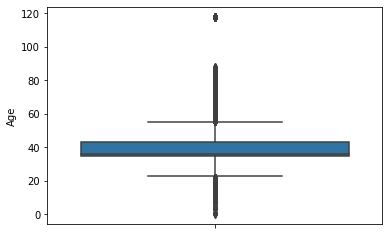

In [9]:
# IQR method for outlier Age
# Calculate Q1, Q2 and IQR
q1 = insurance_data['Age'].quantile(0.25)                 
q3 = insurance_data['Age'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier_age_train = insurance_data[(insurance_data['Age'] < q1 - whisker_width*iqr) | (insurance_data['Age'] > q3 + whisker_width*iqr)]
outlier_age_train

# boxplot with 1.5 whiskers
sns.boxplot(y='Age', data = insurance_data, whis=1.5)

In [10]:
#3.Perform one hot encoding for 'Agency','Gender','Product Name' using sklearn
insurance_data.shape
insurance_data = pd.get_dummies(insurance_data, columns=['Agency','Gender','Product Name'])
insurance_data.shape
insurance_data.head()

,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Gender_F,Gender_M,Gender_Not Specified,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan
0,61,19.8,11.88,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,93,63.0,0.00,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22,22.0,0.00,25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14,54.5,13.63,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,90,10.0,0.00,23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
X=insurance_data.drop('Claim',axis=1)
y=insurance_data['Claim']

In [12]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

# Let's see how the data looks after scaling
scaled_features.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Gender_F,Gender_M,Gender_Not Specified,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Travel Cruise Protect Family,Product Name_Value Plan
0,0.109260,-0.429055,0.105014,-0.779007,-0.034084,-0.071871,-0.386775,-0.038113,-0.056764,-0.037006,2.518586,-1.113396,-0.110292,-0.334292,-0.078156,-0.105577,-0.110003,-0.130408,-0.090144,-0.038654,-0.403668,-0.416596,0.636003,-0.234229,-0.511243,-0.061696,-0.056024,-0.15187,-0.039976,-0.027322,-0.036441,-0.309109,-0.260054,-0.645751,-0.012044,-0.076255,-0.076255,-0.033158,-0.054515,2.518586,-0.191372,-0.056947,-0.033158,-0.055086,-0.015771,-0.130408,-0.090027,-0.004552,-0.212336
1,0.414525,0.455779,-0.498181,-0.279976,-0.034084,-0.071871,-0.386775,-0.038113,-0.056764,-0.037006,-0.397048,0.898153,-0.110292,-0.334292,-0.078156,-0.105577,-0.110003,-0.130408,-0.090144,-0.038654,-0.403668,-0.416596,0.636003,-0.234229,-0.511243,-0.061696,-0.056024,-0.15187,-0.039976,-0.027322,-0.036441,-0.309109,-0.260054,1.548584,-0.012044,-0.076255,-0.076255,-0.033158,-0.054515,-0.397048,-0.191372,-0.056947,-0.033158,-0.055086,-0.015771,-0.130408,-0.090027,-0.004552,-0.212336
2,-0.262781,-0.383994,-0.498181,-1.064167,-0.034084,-0.071871,-0.386775,-0.038113,-0.056764,-0.037006,-0.397048,0.898153,-0.110292,-0.334292,-0.078156,-0.105577,-0.110003,-0.130408,-0.090144,-0.038654,-0.403668,-0.416596,0.636003,-0.234229,1.956016,-0.061696,-0.056024,-0.15187,-0.039976,-0.027322,-0.036441,-0.309109,-0.260054,-0.645751,-0.012044,-0.076255,-0.076255,-0.033158,-0.054515,-0.397048,-0.191372,-0.056947,-0.033158,-0.055086,-0.015771,-0.130408,-0.090027,-0.004552,-0.212336
3,-0.339098,0.281679,0.193868,-1.135457,-0.034084,-0.071871,2.585481,-0.038113,-0.056764,-0.037006,-0.397048,-1.113396,-0.110292,-0.334292,-0.078156,-0.105577,-0.110003,-0.130408,-0.090144,-0.038654,-0.403668,2.400405,-1.572321,-0.234229,-0.511243,-0.061696,-0.056024,-0.15187,-0.039976,-0.027322,-0.036441,-0.309109,-0.260054,-0.645751,-0.012044,-0.076255,-0.076255,-0.033158,-0.054515,-0.397048,5.225417,-0.056947,-0.033158,-0.055086,-0.015771,-0.130408,-0.090027,-0.004552,-0.212336
4,0.385906,-0.629782,-0.498181,-1.206747,-0.034084,-0.071871,-0.386775,-0.038113,-0.056764,-0.037006,-0.397048,0.898153,-0.110292,-0.334292,-0.078156,-0.105577,-0.110003,-0.130408,-0.090144,-0.038654,-0.403668,-0.416596,0.636003,-0.234229,-0.511243,-0.061696,-0.056024,-0.15187,-0.039976,-0.027322,-0.036441,-0.309109,-0.260054,1.548584,-0.012044,-0.076255,-0.076255,-0.033158,-0.054515,-0.397048,-0.191372,-0.056947,-0.033158,-0.055086,-0.015771,-0.130408,-0.090027,-0.004552,-0.212336


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [14]:
# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 25, sampling_strategy = 1.0)   # again we are eqalizing both the classes

In [15]:
# fit the sampling
X_train, y_train = sm.fit_sample(X_train, y_train)

**1.Logistic Regression**

In [16]:
model =LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print(score)

0.8160657549385274


In [17]:
f1_score(y_test, model.predict(X_test))

0.08832591578226635

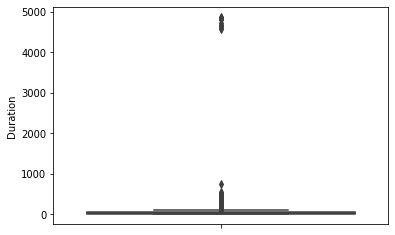

In [18]:
# IQR method for outlier fare
# Calculate Q1, Q2 and IQR
q1 = X['Duration'].quantile(0.25)                 
q3 = X['Duration'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
lower_whisker = q1 - whisker_width*iqr
upper_whisker = q3 + whisker_width*iqr
# Apply filter with respect to IQR, including optional whiskers
outlier_fare_train = X[(X['Duration'] < q1 - whisker_width*iqr) | (X['Duration'] > q3 + whisker_width*iqr)]
outlier_fare_train.shape

# boxplot with 1.5 whiskers
sns.boxplot(y='Duration', data = X, whis=1.5)

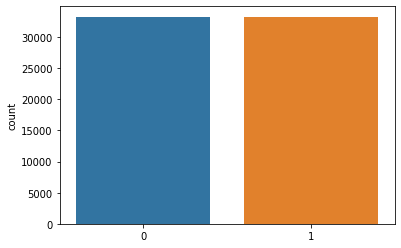

In [19]:
sns.countplot(y_train)
plt.show()

**2. Decision Tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier

# create the model object
dt = DecisionTreeClassifier(random_state=1) # max-depth controls the maximum depth of the tree

# fit the model on train data
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [44]:
#Predictions on the Test data
predictions_dt = dt.predict(X_test)
#Putting the above predictions and probabilities together to create a readable df
pred_label = pd.DataFrame(predictions_dt.reshape(len(predictions_dt),1))
pred_label.rename(columns={0:'prediction'}, inplace=True)
pred_label.head(100)

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,0


In [45]:
test_pred = pd.concat([y_test, pred_label], axis=1)
test_pred.head(30000)
pred_label.shape

(14478, 1)

In [46]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test, pred_label)*100.0, "%")

accuracy is 96.34618041165906 %


In [48]:
f1_score(y_test, predictions_dt)

0.0670194003527337

**3. Randomforest**

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [23]:
forest = RandomForestClassifier(random_state=1)
 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [24]:
f1_score(y_test, forest.predict(X_test))

0.06746987951807228